Você pode adquirir versões impressas e de e-book do *Think Python 3e* (em inglês) em
[Bookshop.org](https://bookshop.org/a/98697/9781098155438) e
[Amazon](https://www.amazon.com/_/dp/1098155432?smid=ATVPDKIKX0DER&_encoding=UTF8&tag=oreilly20-20&_encoding=UTF8&tag=greenteapre01-20&linkCode=ur2&linkId=e2a529f94920295d27ec8a06e757dc7c&camp=1789&creative=9325).

Uma versão em língua portuguesa da 3ª edição foi publicada pela editora [Novatec](https://novatec.com.br/livros/pense-em-python-3ed/).

In [ ]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + str(local))
    return filename

download('https://github.com/AllenDowney/ThinkPython/raw/v3/thinkpython.py');
download('https://github.com/AllenDowney/ThinkPython/raw/v3/diagram.py');

import thinkpython

# Dicionários

Este capítulo apresenta um tipo interno chamado dicionário.
É um dos melhores recursos do Python -- e o alicerce de muitos algoritmos eficientes e elegantes.

Usaremos dicionários para calcular o número de palavras únicas em um livro e o número de vezes que cada uma aparece.
E nos exercícios, usaremos dicionários para resolver quebra-cabeças de palavras.

## Um dicionário é um mapeamento

Um **dicionário** é como uma lista, mas mais geral.
Em uma lista, os índices têm que ser inteiros; em um dicionário, eles podem ser de (quase) qualquer tipo.
Por exemplo, suponha que façamos uma lista de palavras numéricas, como esta:

In [ ]:
lst = ['zero', 'one', 'two']

Podemos usar um número inteiro como índice para obter a palavra correspondente:

In [ ]:
lst[1]

'one'

Agora suponha que queremos ir no sentido contrário e procurar uma palavra para obter o inteiro correspondente.
Não podemos fazer isso com uma lista, mas podemos com um dicionário.
Começaremos criando um dicionário vazio e atribuindo-o a `numbers`:

In [ ]:
numbers = {}
numbers

{}

As chaves, `{}`, representam um dicionário vazio.
Para adicionar itens ao dicionário, usaremos colchetes:

In [ ]:
numbers['zero'] = 0

Esta atribuição adiciona ao dicionário um **item**, que representa a associação de uma **chave** e um **valor**.
Neste exemplo, a chave é a *string* `'zero'` e o valor é o inteiro `0`.
Se exibirmos o dicionário, veremos que ele contém um item, que contém uma chave e um valor separados por dois pontos, `:`:

In [ ]:
numbers

{'zero': 0}

Podemos adicionar mais itens como este:

In [ ]:
numbers['one'] = 1
numbers['two'] = 2
numbers

{'zero': 0, 'one': 1, 'two': 2}

Agora o dicionário contém três itens.

Para procurar uma chave e obter o valor correspondente, usamos o operador de colchetes:

In [ ]:
numbers['two']

2

Se a chave não estiver no dicionário, obteremos um `KeyError`:

In [ ]:
%%expect KeyError
numbers['three']

KeyError: 'three'

A função `len` funciona em dicionários; ela devolve o número de itens.

In [ ]:
len(numbers)

3

Em linguagem matemática, um dicionário representa um **mapeamento** de chaves para valores, então você também pode dizer que cada chave "mapeia para" um valor.
Neste exemplo, cada palavra numérica mapeia para o inteiro correspondente.

A figura a seguir mostra o diagrama de estado para `números`:

In [ ]:
from diagram import make_dict, Binding, Value

d1 = make_dict(numbers, dy=-0.3, offsetx=0.37)
binding1 = Binding(Value('numbers'), d1)

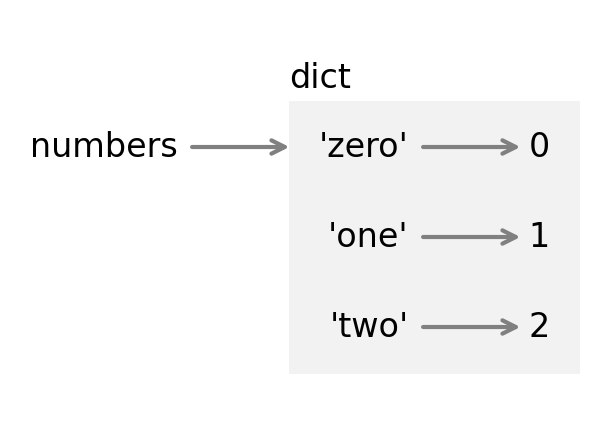

In [ ]:
from diagram import diagram, adjust, Bbox

width, height, x, y = [1.83, 1.24, 0.49, 0.85]
ax = diagram(width, height)
bbox = binding1.draw(ax, x, y)
# adjust(x, y, bbox)

Um dicionário é representado por uma caixa com a palavra "dict" do lado de fora e os itens dentro.
Cada item é representado por uma chave e uma seta apontando para um valor.
As aspas indicam que as chaves aqui são *strings*, não nomes de variáveis.

## Criando dicionários

Na seção anterior, criamos um dicionário vazio e adicionamos itens, um de cada vez, usando o operador de colchetes.
Em vez disso, poderíamos ter criado o dicionário de uma só vez, assim:

In [ ]:
numbers = {'zero': 0, 'one': 1, 'two': 2}

Cada item consiste de uma chave e um valor separados por dois pontos.
Os itens são separados por vírgulas e colocados entre chaves.

Outra maneira de criar um dicionário é usar a função `dict`.
Podemos criar um dicionário vazio assim:

In [ ]:
empty = dict()
empty

{}

E podemos fazer uma cópia de um dicionário assim:

In [ ]:
numbers_copy = dict(numbers)
numbers_copy

{'zero': 0, 'one': 1, 'two': 2}

Muitas vezes é útil fazer uma cópia antes de executar operações que modificam dicionários.

## O operador `in`

O operador `in` também funciona em dicionários; ele informa se algo aparece como uma *chave* no dicionário:

In [ ]:
'one' in numbers

True

O operador `in` *não* verifica se algo aparece como um valor:

In [ ]:
1 in numbers

False

Para ver se algo aparece como um valor em um dicionário, você pode usar o método `values`, que devolve uma sequência de valores, e então usar o operador `in`:

In [ ]:
1 in numbers.values()

True

Os itens em um dicionário Python são armazenados em uma **tabela hash**, que é uma maneira de organizar dados que tem uma propriedade notável: o operador `in` leva aproximadamente a mesma quantidade de tempo, não importa quantos itens estejam no dicionário.
Isso torna possível escrever alguns algoritmos notavelmente eficientes.

In [ ]:
download('https://raw.githubusercontent.com/AllenDowney/ThinkPython/v3/words.txt');

Para demonstrar, compararemos dois algoritmos para encontrar pares de palavras onde uma é o inverso da outra -- como `stressed` e `desserts`.
Começaremos lendo a lista de palavras:

In [ ]:
word_list = open('words.txt').read().split()
len(word_list)

113783

E aqui está `reverse_word` do capítulo anterior:

In [ ]:
def reverse_word(word):
    return ''.join(reversed(word))

A função a seguir percorre as palavras na lista.
Para cada uma, ela inverte as letras e então verifica se a palavra invertida está na lista de palavras:

In [ ]:
def too_slow():
    count = 0
    for word in word_list:
        if reverse_word(word) in word_list:
            count += 1
    return count

Esta função leva mais de um minuto para ser executada.
O problema é que o operador `in` verifica as palavras na lista uma de cada vez, começando do começo.
Se ele não encontrar o que está procurando -- o que acontece na maioria das vezes -- ele tem que procurar até o fim.

Para medir quanto tempo uma função leva, podemos usar `%time` que é um dos "comandos mágicos internos" do Jupyter.
Esses comandos não fazem parte da linguagem Python, então eles podem não funcionar em outros ambientes de desenvolvimento.

In [ ]:
# %time too_slow()

E o operador `in` está dentro do laço de repetição, então ele repete uma vez para cada palavra.
Como há mais de 100.000 palavras na lista, e para cada uma verificamos mais de 100.000 palavras, o número total de comparações é o número de palavras ao quadrado -- aproximadamente -- que é quase 13 bilhões:

In [ ]:
len(word_list)**2

12946571089

Podemos tornar essa função muito mais rápida com um dicionário.
O laço de pretição a seguir cria um dicionário que contém as palavras como chaves:

In [ ]:
word_dict = {}
for word in word_list:
    word_dict[word] = 1

Os valores em `word_dict` são todos `1`, mas podem ser qualquer coisa, porque nunca os procuraremos -- usaremos este dicionário apenas para verificar se uma chave existe.

Agora, aqui está uma versão da função anterior que substitui `word_list` por `word_dict`:

In [ ]:
def much_faster():
    count = 0
    for word in word_dict:
        if reverse_word(word) in word_dict:
            count += 1
    return count

Essa função leva menos de um centésimo de segundo, então é cerca de 10.000 vezes mais rápida que a versão anterior:

Em geral, o tempo que leva para encontrar um elemento em uma lista é proporcional ao comprimento da lista.
O tempo que leva para encontrar uma chave em um dicionário é quase constante -- independentemente do número de itens.

In [ ]:
%time much_faster()

CPU times: user 59.4 ms, sys: 0 ns, total: 59.4 ms
Wall time: 59.1 ms


885

## Uma coleção de contadores

Suponha que você receba uma *string* e queira contar quantas vezes cada letra ocorre nela.
Um dicionário é uma boa ferramenta para esse trabalho.
Começaremos com um dicionário vazio:

In [ ]:
counter = {}

Conforme percorremos as letras na *string*, suponha que vemos a letra `'a'` pela primeira vez.
Podemos adicioná-la ao dicionário assim:

In [ ]:
counter['a'] = 1

O valor `1` indica que vimos a letra uma vez.
Mais tarde, se virmos a mesma letra novamente, podemos incrementar o contador assim:

In [ ]:
counter['a'] += 1

Agora o valor associado a `'a'` é `2`, porque vimos a letra duas vezes:

In [ ]:
counter

{'a': 2}

A função a seguir usa esses recursos para contar o número de vezes que cada letra aparece em uma *string*:

In [ ]:
def value_counts(string):
    counter = {}
    for letter in string:
        if letter not in counter:
            counter[letter] = 1
        else:
            counter[letter] += 1
    return counter

Cada vez que passamos pelo laço, se `letter` não estiver no dicionário, criamos um novo item com a chave `letter` e o valor `1`.
Se `letter` já estiver no dicionário, incrementamos o valor associado a `letter`.

Aqui está um exemplo:

In [ ]:
counter = value_counts('brontosaurus')
counter

{'b': 1, 'r': 2, 'o': 2, 'n': 1, 't': 1, 's': 2, 'a': 1, 'u': 2}

Os itens em `counter` mostram que a letra `'b'` aparece uma vez, `'r'` aparece duas vezes, e assim por diante.

## Repetição e dicionários

Se você usar um dicionário em uma instrução `for`, ele percorrerá as chaves do dicionário.
Para demonstrar, vamos fazer um dicionário que conta as letras em `'banana'`:

In [ ]:
counter = value_counts('banana')
counter

{'b': 1, 'a': 3, 'n': 2}

O laço de repetição a seguir exibe as chaves, que são as letras:

In [ ]:
for key in counter:
    print(key)

b
a
n


Para exibir os valores, podemos usar o método `values`:

In [ ]:
for value in counter.values():
    print(value)

1
3
2


Para exibir as chaves e os valores, podemos percorrer as chaves e procurar os valores correspondentes:

In [ ]:
for key in counter:
    value = counter[key]
    print(key, value)

b 1
a 3
n 2


No próximo capítulo, veremos uma maneira mais concisa de fazer a mesma coisa.

## Listas e dicionários

Você pode colocar uma lista em um dicionário como um valor.
Por exemplo, aqui está um dicionário que mapeia o número `4` para uma lista de quatro letras:

In [ ]:
d = {4: ['r', 'o', 'u', 's']}
d

{4: ['r', 'o', 'u', 's']}

Mas você não pode colocar uma lista em um dicionário como uma chave.
Eis o que acontece se tentarmos:

In [ ]:
%%expect TypeError
letters = list('abcd')
d[letters] = 4

TypeError: unhashable type: 'list'

Mencionei anteriormente que os dicionários usam tabelas de hash, e isso significa que as chaves precisam ser **hasheáveis**.

Uma **hash** é uma função que pega um valor (de qualquer tipo) e devolve um inteiro.
Os dicionários usam esses inteiros, chamados valores de *hash*, para armazenar e procurar chaves.

Este sistema só funciona se uma chave for imutável, tal que seu valor de *hash* seja sempre o mesmo.
Mas se uma chave for mutável, seu valor de *hash* pode mudar, e o dicionário não funcionaria.
É por isso que as chaves precisam ser hasheáveis, e por isso que tipos mutáveis ​​como listas não são.

Como os dicionários são mutáveis, eles também não podem ser usados ​​como chaves.
Mas eles *podem* ser usados ​​como valores.

## Acumulando uma lista

Para muitas tarefas de programação, é útil fazer percorrer uma lista ou dicionário enquanto se constrói outro.
Como exemplo, percorreremos as palavras em `word_dict` e faremos uma lista de palíndromos -- isto é, palavras que são escritas da mesma forma de trás para frente, como "noon" e "rotator".

No capítulo anterior, um dos exercícios pediu para você escrever uma função que verifica se uma palavra é um palíndromo.
Aqui está uma solução que usa `reverse_word`:

In [ ]:
def is_palindrome(word):
    """Verifica se uma palavra é um palíndromo."""
    return reverse_word(word) == word

Se percorrermos as palavras em `word_dict`, podemos contar o número de palíndromos assim:

In [ ]:
count = 0

for word in word_dict:
    if is_palindrome(word):
        count +=1

count

91

A esta altura, esse padrão já é familiar.

* Antes do laço, `count` é inicializada como `0`.

* Dentro do laço, se `word` for um palíndromo, incrementamos `count`.

* Quando o laço termina, `count` contém o número total de palíndromos.

Podemos usar um padrão semelhante para fazer uma lista de palíndromos:

In [ ]:
palindromes = []

for word in word_dict:
    if is_palindrome(word):
        palindromes.append(word)

palindromes[:10]

['aa', 'aba', 'aga', 'aha', 'ala', 'alula', 'ama', 'ana', 'anna', 'ava']

Veja como funciona:

* Antes do laço, `palindromes` é inicializada com uma lista vazia.

* Dentro do laço, se `word` for um palíndromo, nós o colocamos ao final de `palindromes`.

* Quando o laço termina, `palindromes` é uma lista de palíndromos.

Neste laço, `palindromes` é usado como um **acumulador**, que é uma variável que coleta ou acumula dados durante uma computação.

Agora, suponha que queremos selecionar apenas palíndromos com sete ou mais letras.
Podemos percorrer `palindromes` e criar uma nova lista que contenha apenas palíndromos longos.

In [ ]:
long_palindromes = []

for word in palindromes:
    if len(word) >= 7:
        long_palindromes.append(word)

long_palindromes

['deified', 'halalah', 'reifier', 'repaper', 'reviver', 'rotator', 'sememes']

Percorrer uma lista como essa, selecionando alguns elementos e omitindo outros, é chamado de **filtragem**.

## Memos

Se você executou a função `fibonacci` do [Capítulo 6](https://colab.research.google.com/github/rodrigocarlson/PensePython3ed/blob/main/capitulos/chap06.ipynb), talvez tenha notado que quanto maior o argumento fornecido, mais tempo a função leva para ser executada.

In [ ]:
def fibonacci(n):
    if n == 0:
        return 0

    if n == 1:
        return 1

    return fibonacci(n-1) + fibonacci(n-2)

Além disso, o tempo de execução aumenta rapidamente.
Para entender o porquê, considere a figura a seguir, que mostra o **grafo de chamadas** para `fibonacci` com `n=4`:

In [ ]:
from diagram import make_binding, Frame, Arrow

bindings = [make_binding('n', i) for i in range(5)]
frames = [Frame([binding]) for binding in bindings]

In [ ]:
arrowprops = dict(arrowstyle="-", color='gray', alpha=0.5, ls='-', lw=0.5)

def left_arrow(ax, bbox1, bbox2):
    x = bbox1.xmin + 0.1
    y = bbox1.ymin
    dx = bbox2.xmax - x - 0.1
    dy = bbox2.ymax - y
    arrow = Arrow(dx=dx, dy=dy, arrowprops=arrowprops)
    return arrow.draw(ax, x, y)

def right_arrow(ax, bbox1, bbox2):
    x = bbox1.xmax - 0.1
    y = bbox1.ymin
    dx = bbox2.xmin - x + 0.1
    dy = bbox2.ymax - y
    arrow = Arrow(dx=dx, dy=dy, arrowprops=arrowprops)
    return arrow.draw(ax, x, y)

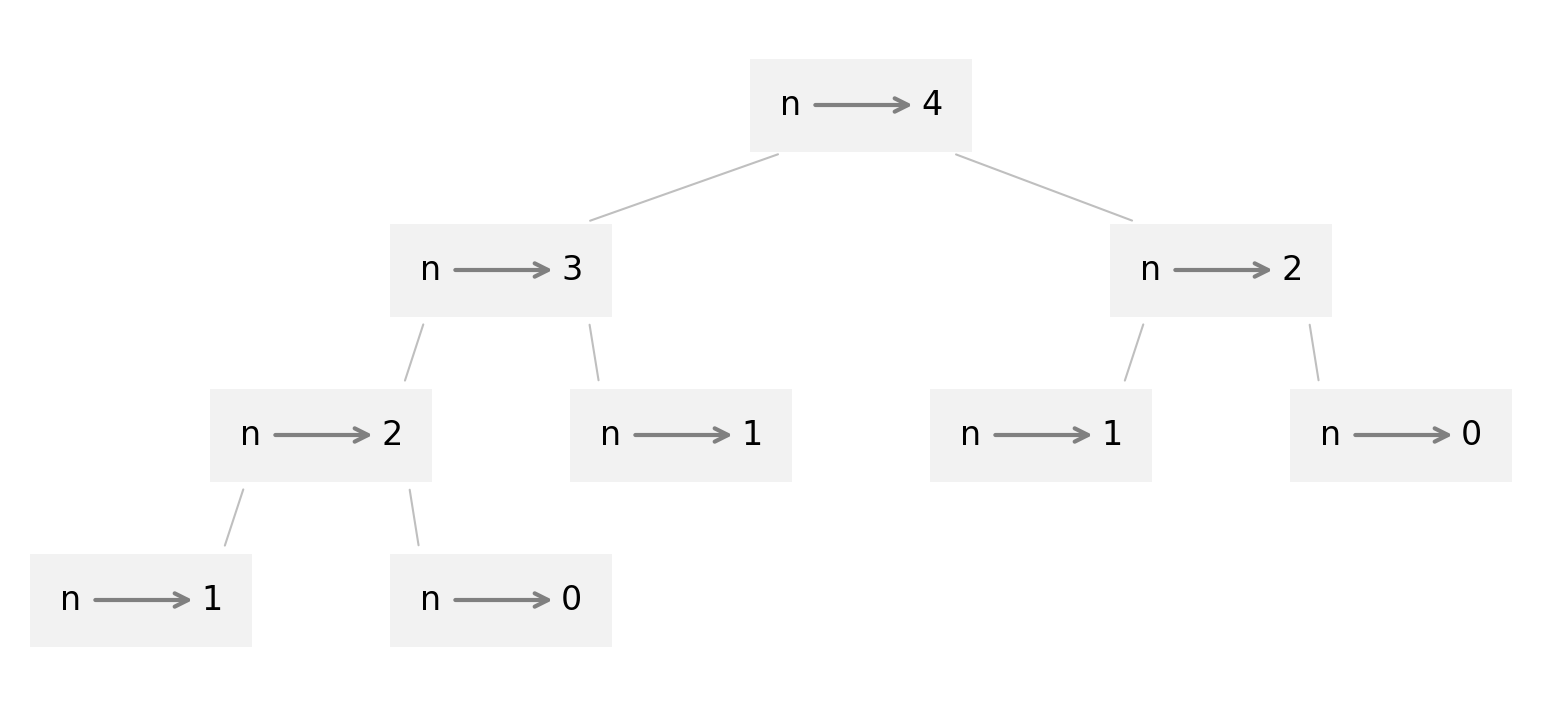

In [ ]:
from diagram import diagram, adjust, Bbox

width, height, x, y = [4.94, 2.16, -1.03, 1.91]
ax = diagram(width, height)

dx = 0.6
dy = 0.55

bboxes = []
bboxes.append(frames[4].draw(ax, x+6*dx, y))

bboxes.append(frames[3].draw(ax, x+4*dx, y-dy))
bboxes.append(frames[2].draw(ax, x+8*dx, y-dy))

bboxes.append(frames[2].draw(ax, x+3*dx, y-2*dy))
bboxes.append(frames[1].draw(ax, x+5*dx, y-2*dy))
bboxes.append(frames[1].draw(ax, x+7*dx, y-2*dy))
bboxes.append(frames[0].draw(ax, x+9*dx, y-2*dy))

bboxes.append(frames[1].draw(ax, x+2*dx, y-3*dy))
bboxes.append(frames[0].draw(ax, x+4*dx, y-3*dy))

left_arrow(ax, bboxes[0], bboxes[1])
left_arrow(ax, bboxes[1], bboxes[3])
left_arrow(ax, bboxes[3], bboxes[7])
left_arrow(ax, bboxes[2], bboxes[5])

right_arrow(ax, bboxes[0], bboxes[2])
right_arrow(ax, bboxes[1], bboxes[4])
right_arrow(ax, bboxes[2], bboxes[6])
right_arrow(ax, bboxes[3], bboxes[8])

bbox = Bbox.union(bboxes)
# adjust(x, y, bbox)

Um grafo de chamadas mostra um conjunto de quadros de funções, com linhas conectando cada quadro aos quadros das funções que ele chama.
No topo do grafo, `fibonacci` com `n=4` chama `fibonacci` com `n=3` e `n=2`.
Por sua vez, `fibonacci` com `n=3` chama `fibonacci` com `n=2` e `n=1`. E assim por diante.

Conte quantas vezes `fibonacci(0)` e `fibonacci(1)` são chamados.
Esta é uma solução ineficiente para o problema, e piora conforme o argumento fica maior.

Uma solução é manter o controle dos valores que já foram computados armazenando-os em um dicionário.
Um valor previamente computado que é armazenado para uso posterior é chamado de **memo**.
Esta é uma versão "memoizada" de `fibonacci`:

In [ ]:
known = {0:0, 1:1}

def fibonacci_memo(n):
    if n in known:
        return known[n]

    res = fibonacci_memo(n-1) + fibonacci_memo(n-2)
    known[n] = res
    return res

`known` é um dicionário que mantém o controle dos números de Fibonacci que já conhecemos.
Ele começa com dois itens: `0` mapeia para `0` e `1` mapeia para `1`.

Sempre que `fibonacci_memo` é chamado, ele verifica `known`.
Se o resultado já estiver lá, ele pode devolver o valor imediatamente.
Caso contrário, ele tem que calcular o novo valor, adicioná-lo ao dicionário e devolvê-lo.

Comparando as duas funções, `fibonacci(40)` leva cerca de 30 segundos para ser executada.
`fibonacci_memo(40)` leva cerca de 30 microssegundos, então é um milhão de vezes mais rápida.
No *notebook* deste capítulo, você verá de onde vêm essas medições.

In [ ]:
# %time fibonacci(40)

In [ ]:
%time fibonacci_memo(40)

CPU times: user 13 µs, sys: 9 µs, total: 22 µs
Wall time: 24.3 µs


102334155

## Depuração

À medida que você trabalha com conjuntos de dados maiores, pode se tornar difícil depurar exibindo na tela e verificando a saída manualmente. Aqui estão algumas sugestões para depurar grandes conjuntos de dados:

1. Reduza a entrada: se possível, reduza o tamanho do conjunto de dados. Por exemplo, se o programa lê um arquivo de texto, comece apenas com as 10 primeiras linhas ou com o menor exemplo que você puder encontrar. Você pode editar os arquivos em si ou (melhor) modificar o programa para que ele leia apenas as primeiras `n` linhas.

Se houver um erro, você pode reduzir `n` para o menor valor onde o erro ocorre. À medida que você encontra e corrige erros, você pode aumentar `n` gradualmente.

2. Verifique resumos e tipos: em vez de exibir na tela e verificar todo o conjunto de dados, considere exibir resumos dos dados -- por exemplo, o número de itens em um dicionário ou o total de uma lista de números.

Uma causa comum de erros de tempo de execução é um valor que não é do tipo certo. Para depurar esse tipo de erro, geralmente é suficiente exibir na tela o tipo de um valor.

3. Escreva autoverificações: Às vezes, você pode escrever um código para verificar erros automaticamente. Por exemplo, se você estiver calculando a média de uma lista de números, você poderia verificar se o resultado não é maior que o maior elemento na lista ou menor que o menor. Isso é chamado de "verificação de sanidade" porque detecta resultados que são "insanos".

Outro tipo de verificação compara os resultados de dois cálculos diferentes para ver se eles são consistentes. Isso é chamado de "verificação de consistência".

4. Formate a saída: Formatar a saída de depuração pode facilitar a detecção de um erro. Vimos um exemplo no [Capítulo 6](https://colab.research.google.com/github/rodrigocarlson/PensePython3ed/blob/main/capitulos/chap06.ipynb). Outra ferramenta que você pode achar útil é o módulo `pprint`, que fornece uma função `pprint` que exibe tipos internos em um formato mais legível para humanos (`pprint` significa "pretty print", isto é, "exibição bonita").

Novamente, o tempo gasto na construção de códigos de suporte pode reduzir o tempo gasto na depuração.

## Glossário

**dicionário** (*dictionary*)**:**
Um objeto que contém pares chave-valor, também chamados de itens.

**item** (*item*)**:**
Em um dicionário, outro nome para um par chave-valor.

**chave** (*key*)**:**
Um objeto que aparece em um dicionário como a primeira parte de um par chave-valor.

**valor** (*value*)**:**
Um objeto que aparece em um dicionário como a segunda parte de um par chave-valor. Esse é um uso mais específico do que nosso uso anterior da palavra "valor".

**mapeamento** (*mapping*)**:**
Uma relação na qual cada elemento de um conjunto corresponde a um elemento de outro conjunto.

**tabela hash** (*hash table*)**:**
Uma coleção de pares chave-valor organizados para que possamos procurar uma chave e encontrar seu valor de forma eficiente.

**hasheável** (*hashable*)**:**
Tipos imutáveis ​​como inteiros, *floats* e *strings* são hasheáveis.
Tipos mutáveis ​​como listas e dicionários não são.

**função hash** (*hash function*)**:**
Uma função que recebe um objeto e calcula um inteiro que é usado para localizar uma chave em uma tabela hash.

**acumulador** (*accumulator*)**:**
Uma variável usada em um laço de repetição para somar ou acumular um resultado.

**filtragem** (*filtering*)**:**
Percorrer uma sequência e selecionar ou omitir elementos.

**grafo de chamadas** (*call graph*)**:**
Um diagrama que mostra cada quadro criado durante a execução de um programa, com uma seta de cada chamador para cada chamado.

***memo*:**
Um valor computado armazenado para evitar cálculos futuros desnecessários.

## Exercícios

In [ ]:
# Esta célula diz ao Jupyter para fornecer informações detalhadas de depuração
# quando ocorre um erro de tempo de execução. Execute-a antes de trabalhar nos
# exercícios.

%xmode Verbose

### Pergunte a um assistente virtual

Neste capítulo, eu disse que as chaves em um dicionário precisam ser hasheáveis ​​e dei uma breve explicação. Se você quiser mais detalhes, pergunte a um assistente virtual, "Por que as chaves em dicionários Python precisam ser hasheáveis?" ("*Why do keys in Python dictionaries have to be hashable?*").

Em [uma seção anterior](section_dictionary_in_operator), armazenamos uma lista de palavras como chaves em um dicionário para que pudéssemos usar uma versão eficiente do operador `in`.
Poderíamos ter feito a mesma coisa usando um `set`, que é outro tipo de dado interno.
Pergunte a um assistente virtual, "Como faço um conjunto Python a partir de uma lista de *strings* e verifico se uma *string* é um elemento do conjunto?" ("*How do I make a Python set from a list of strings and check whether a string is an element of the set?*").

### Exercício

Os dicionários têm um método chamado `get` que recebe uma chave e um valor padrão.
Se a chave estiver no dicionário, `get` devolve o valor correspondente; caso contrário, ela devolve o valor padrão.
Por exemplo, aqui está um dicionário que mapeia letras de uma string para o número de vezes que elas aparecem:

In [ ]:
counter = value_counts('brontosaurus')

Se procurarmos uma letra que está na palavra, `get` devolverá o número de vezes que ela aparece:

In [ ]:
counter.get('b', 0)

1

Use `get` para escrever uma versão mais concisa de `value_counts`.
Você deveria conseguir eliminar a instrução `if`.

In [ ]:
counter.get('c', 0)

0

Use `get` para escrever uma versão mais concisa de `value_counts`.
Você deveria conseguir eliminar a instrução `if`.

### Exercício

Qual é a palavra mais longa que você consegue pensar em que cada letra aparece apenas uma vez?
Vamos ver se conseguimos encontrar uma mais longa que `unpredictably`.

Escreva uma função chamada `has_duplicates` que recebe uma sequência -- como uma lista ou *string* -- como um parâmetro e devolve `True` se houver algum elemento que apareça na sequência mais de uma vez.

Para começar, aqui está um esboço da função com doctests:

In [ ]:
def has_duplicates(t):
    """Verifica se algum elemento em uma sequência aparece mais de uma vez.

    >>> has_duplicates('banana')
    True
    >>> has_duplicates('ambidextrously')
    False
    >>> has_duplicates([1, 2, 2])
    True
    >>> has_duplicates([1, 2, 3])
    False
    """
    return None

In [ ]:
# Solução

def has_duplicates(t):
    """Verifica se algum elemento em uma sequência aparece mais de uma vez.

    >>> has_duplicates('banana')
    True
    >>> has_duplicates('ambidextrously')
    False
    >>> has_duplicates([1, 2, 2])
    True
    >>> has_duplicates([1, 2, 3])
    False
    """
    d = {}
    for x in t:
        d[x] = True
    return len(d) < len(t)

Você pode usar `doctest` para testar sua função:

In [ ]:
from doctest import run_docstring_examples

def run_doctests(func):
    run_docstring_examples(func, globals(), name=func.__name__)

run_doctests(has_duplicates)

Você pode usar esse laço de reptição para encontrar as palavras mais longas sem letras repetidas:

In [ ]:
no_repeats = []

for word in word_list:
    if len(word) > 12 and not has_duplicates(word):
        no_repeats.append(word)

no_repeats

['ambidextrously',
 'lycanthropies',
 'metalworkings',
 'multibranched',
 'unpredictably']

### Exercício

Escreva uma função chamada `find_repeats` que recebe um dicionário que mapeia de cada chave para um contador, como o resultado de `value_counts`.
Ela deve percorrer o dicionário e devolver uma lista de chaves que têm contagens maiores que `1`.
Você pode usar o seguinte esboço para começar:

In [1]:
def find_repeats(counter):
    """Cria uma lista de chaves com valores maiores que 1.

    counter: dicionário que mapeia de chaves para contagens

    returns: lista de chaves
    """
    return []

In [ ]:
# Solução

def find_repeats(counter):
    """Cria uma lista de chaves com valores maiores que 1.

    counter: dicionário que mapeia de chaves para contagens

    returns: lista de chaves
    """
    repeats = []
    for key, count in counter.items():
        if count > 1:
            repeats.append(key)
    return repeats

Você pode usar os seguintes exemplos para testar seu código.
Primeiro, faremos um dicionário que mapeia letras para contagens:

In [ ]:
counter1 = value_counts('banana')
counter1

{'b': 1, 'a': 3, 'n': 2}

O resultado de `find_repeats` deve ser `['a', 'n']`:

In [ ]:
repeats = find_repeats(counter1)
repeats

['a', 'n']

Aqui está outro exemplo que começa com uma lista de números.
O resultado deve ser `[1, 2]`:

In [ ]:
counter1 = value_counts([1, 2, 3, 2, 1])
repeats = find_repeats(counter1)
repeats

[1, 2]

### Exercício

Suponha que você execute `value_counts` com duas palavras diferentes e salve os resultados em dois dicionários:

In [ ]:
counter1 = value_counts('brontosaurus')
counter2 = value_counts('apatosaurus')

Cada dicionário mapeia um conjunto de letras para o número de vezes que elas aparecem.
Escreva uma função chamada `add_counters` que pega dois dicionários como este e devolve um novo dicionário que contém todas as letras e o número total de vezes que elas aparecem em cada palavra.

Há muitas maneiras de resolver esse problema.
Depois que você tiver uma solução funcional, considere pedir a um assistente virtual por soluções diferentes.

In [ ]:
# Solução

def add_counters(counter1, counter2):
    result = dict(counter1)
    for letter, count in counter2.items():
        result[letter] = result.get(letter, 0) + count
    return result

In [ ]:
# Solução

add_counters(counter1, counter2)

{'b': 1, 'r': 3, 'o': 3, 'n': 1, 't': 2, 's': 4, 'a': 4, 'u': 4, 'p': 1}

### Exercício

Uma palavra é "*interlocking*" se pudermos dividi-la em duas palavras pegando letras alternadas.
Por exemplo, "*schooled*" é uma palavra interligada porque pode ser dividida em "*shoe*" e "*cold*".

Para selecionar letras alternadas de uma *string*, você pode usar um operador de fatiamento com três componentes que indicam onde começar, onde parar e o "tamanho do passo" entre as letras.

No fatiamento a seguir, o primeiro componente é `0`, então começamos com a primeira letra. O segundo componente é `None`, o que significa que devemos ir até o final da *string*. E o terceiro componente é `2`, então há dois passos entre as letras que selecionamos.:

In [ ]:
word = 'schooled'
first = word[0:None:2]
first

'shoe'

Em vez de fornecer `None` como o segundo componente, podemos obter o mesmo efeito deixando-o de fora completamente.
Por exemplo, o fatiamento a seguir seleciona letras alternadas, começando com a segunda letra:

In [ ]:
second = word[1::2]
second

'cold'

Escreva uma função chamada `is_interlocking` que recebe uma palavra como argumento e devolver `True` se ela puder ser dividida em duas palavras *interlocked*.

In [ ]:
# Solução

def is_interlocking(word):
    first = word[0::2]
    second = word[1::2]
    return first in word_dict and second in word_dict

Você pode usar o seguinte laço de repetição para encontrar as palavras *interlocked* na lista de palavras:

In [ ]:
for word in word_list:
    if len(word) >= 8 and is_interlocking(word):
        first = word[0::2]
        second = word[1::2]
        print(word, first, second)

adroitly aril doty
agrarians arras gain
alienees aine lees
arrestee arse rete
arrestees arses rete
ballooned blond aloe
barmaids brad amis
baudrons burn ados
beakless bals ekes
beamless bals emes
bloodred bode lord
blueness buns lees
booklets bolt okes
burseeds bred uses
calliope clip aloe
calliopes clips aloe
cellules clue ells
cheerier cere heir
colludes clue olds
cookless cols okes
coolness cons oles
countess cuts ones
couplets cult opes
dainties dite anis
doorless dols ores
dourness duns ores
fairness fins ares
fleetest fets leet
fleetness fetes lens
foulness funs oles
freeness fens rees
friended fine redd
furrings frig urns
goalless gals oles
greeniest genet reis
greyness gens ryes
grounded gone rudd
hooklets holt okes
ignitron into girn
isleless ills sees
mailless mils ales
moonless mols ones
moonlets molt ones
moonsets most ones
neutrals nurl etas
oghamist ohms gait
parietes pree aits
peakless pals ekes
plainness panes lins
playless pals lyes
pleonasm pens loam
poorness pons ore

[Pense Python: 3ª Edição](https://rodrigocarlson.github.io/PensePython3ed/)

Copyright 2024 [Allen B. Downey](https://allendowney.com/) (versão original)

Copyright 2025 [Rodrigo Castelan Carlson](https://rodrigocarlson.paginas.ufsc.br/) (desta versão)

Foram preservadas as mesmas licenças da versão original.

Licença dos códigos: [MIT License](https://mit-license.org/)

Licença dos textos: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)